In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm, colors
sns.set_theme()

import os
import init_simple_mdp as imdp


In [58]:
df = pd.read_csv('player10_results.csv')
df = df[['epsilon','tokens','score','remaining_throws','score_gained','optimal_value','optimal_policy']]

# Map to policy action names 
a_map = {i:imdp.a_list[i] for i in range(len(imdp.a_list))}
df['optimal_policy_name'] = df['optimal_policy'].map(a_map)

In [59]:
def color_map_color(value, cmap_name='Wistia', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = colors.rgb2hex(rgb)
    return color

In [60]:
# epsilon_list = [1,2,4,8,16,32,64,128]
# epsilon_list = [1,2,4,6,8,10,12,14,16,18,20]
epsilon_list = [1,2,3,4,5,6,7,8,9]

In [61]:
# Get dataframe only for score values at 501 
df_501 = df.loc[df.score==501]
df_501_rt3 = df_501.loc[df_501.remaining_throws == 3]

# Create dataframes for values at 501 for each token value 
token_dfs = []

for token in range(10):
    
    temp = df_501_rt3.loc[df_501_rt3.tokens==token].set_index('epsilon')['optimal_value'].copy()
    token_dfs.append(temp)

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df_501_rt3.loc[df_501_rt3.epsilon==epsilon].set_index('tokens')['optimal_value'].copy()
    epsilon_dfs.append(temp)

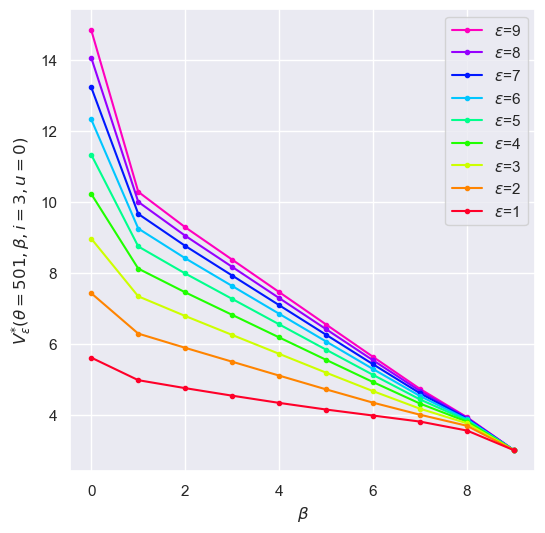

In [62]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon = epsilon_list[e]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    e_leg.append(r'$\epsilon$={}'.format(epsilon))
    fig = plt.plot(epsilon_dfs[e],marker ='.',color=color)

#fig = plt.title('Variation of expected number of throws with $\epsilon$ and credits')
fig = plt.xlabel(r'$\beta$')
fig = plt.ylabel(r'$V_{\epsilon}^{*}(\theta=501,\beta,i=3,u=0)$')
fig = plt.legend(e_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
#fig = plt.axhline(epsilon_dfs[0][0],color='black',linestyle='dotted') 

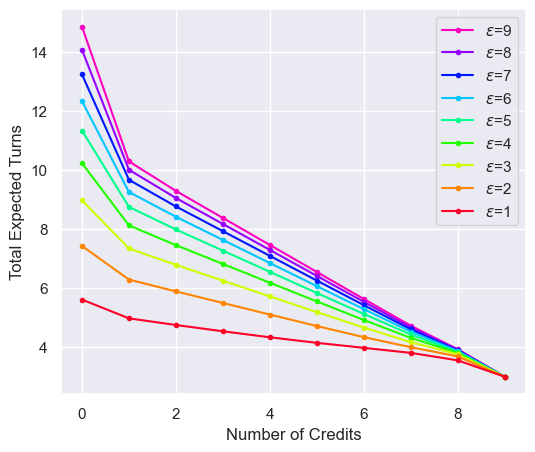

In [63]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(6,5)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon = epsilon_list[e]
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    e_leg.append(r'$\epsilon$={}'.format(epsilon))
    fig = plt.plot(epsilon_dfs[e],marker ='.',color=color)

#fig = plt.title('Variation of expected number of throws with $\epsilon$ and credits')
fig = plt.xlabel(r'Number of Credits')
fig = plt.ylabel(r'Total Expected Turns')
fig = plt.legend(e_leg)

# Plot horizontal line for pro performance with e=1 and no tokens 
#fig = plt.axhline(epsilon_dfs[0][0],color='black',linestyle='dotted') 

In [64]:
df0 = df.loc[df.tokens==0].copy()
df0_rt3 = df0.loc[df0.remaining_throws==3].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df0_rt3.loc[df0_rt3.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


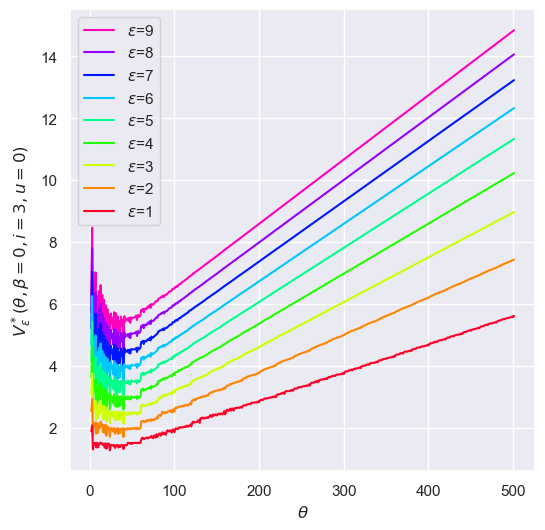

In [65]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(8,7)})
fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon=epsilon_list[e]
    e_leg.append('$\epsilon$={}'.format(epsilon))
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[e],color=color)

fig = plt.legend(e_leg) 
#fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel(r'$\theta$')
#fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel(r'$V^*_{\epsilon}(\theta,\beta=0,i=3,u=0)$')
fig = plt.legend(e_leg)

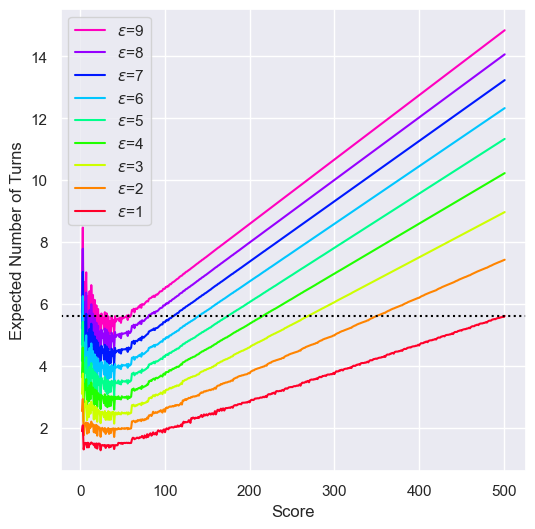

In [66]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(8,7)})
fig = sns.set(rc={'figure.figsize':(6,6)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon=epsilon_list[e]
    e_leg.append('$\epsilon$={}'.format(epsilon))
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[e],color=color)

fig = plt.legend(e_leg) 
#fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel(r'Score')
fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel(r'Expected Number of Turns')
fig = plt.legend(e_leg)

In [67]:
df1 = df.loc[df.tokens==5].copy()
df1_rt3 = df1.loc[df1.remaining_throws==3].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df1_rt3.loc[df1_rt3.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


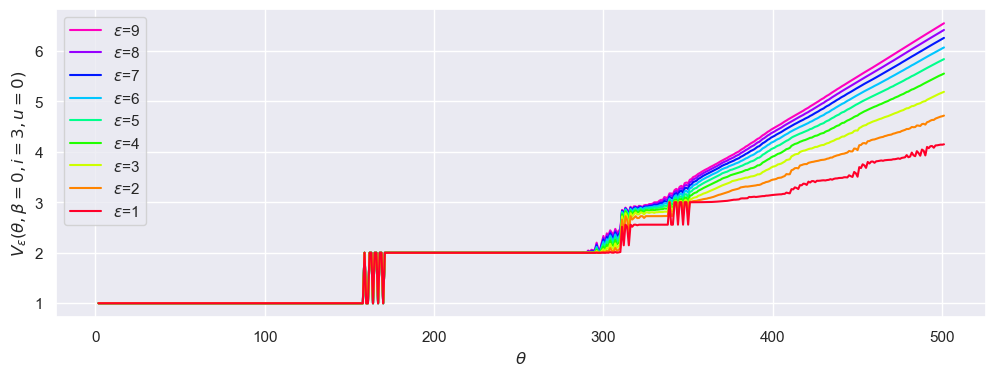

In [68]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(12,4)})

#fig = sns.set(rc={'figure.figsize':(3,6)})


# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon=epsilon_list[e]
    e_leg.append('$\epsilon$={}'.format(epsilon))
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[e],color=color)

fig = plt.legend(e_leg) 
#fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel(r'$\theta$')
#fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel(r'$V_{\epsilon}(\theta,\beta=0,i=3,u=0)$')
fig = plt.legend(e_leg)

In [69]:
df2 = df.loc[df.tokens==9].copy()
df2_rt3 = df2.loc[df2.remaining_throws==3].copy()

# Create dataframes for values at 501 for each token value 
epsilon_dfs = []

for e in range(len(epsilon_list)):
    epsilon = epsilon_list[e]
    temp = df2_rt3.loc[df2_rt3.epsilon==epsilon].set_index('score')['optimal_value'].copy()
    epsilon_dfs.append(temp)


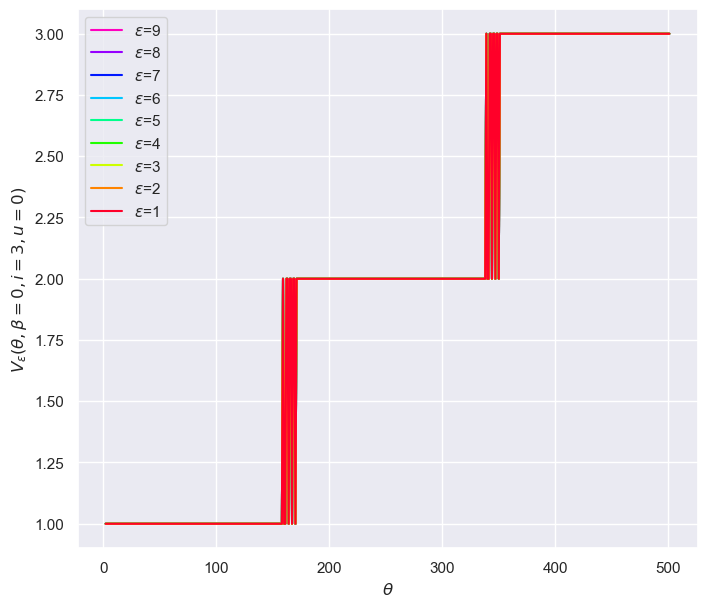

In [70]:
e_leg = []
vmax=max(epsilon_list)
vmin=min(epsilon_list)

fig = sns.set(rc={'figure.figsize':(8,7)})

# Plot each token line 
for e in reversed(range(len(epsilon_list))):
    epsilon=epsilon_list[e]
    e_leg.append('$\epsilon$={}'.format(epsilon))
    color = color_map_color(epsilon, cmap_name='gist_rainbow', vmin=vmin, vmax=vmax)
    fig = plt.plot(epsilon_dfs[e],color=color)

fig = plt.legend(e_leg) 
#fig = plt.title('Expected remaining throws as score changes')
fig = plt.xlabel(r'$\theta$')
#fig = plt.axhline(epsilon_dfs[0][501],color='black',linestyle='dotted') 
fig = plt.ylabel(r'$V_{\epsilon}(\theta,\beta=0,i=3,u=0)$')
fig = plt.legend(e_leg)